In [1]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt

from imutils import face_utils
import imutils
import dlib
import cv2

!ls processed-imdb-wiki-dataset-master

Age and Gender Distribution.ipynb gender.py
LICENSE                           mat.py
README.md                         meta.csv
age.py                            wiki


In [2]:
data = pd.read_csv('processed-imdb-wiki-dataset-master/meta.csv')

In [3]:
def clean_path(path):
    p = path.split('/')
    return 'processed-imdb-wiki-dataset-master/' + 'wiki/' + p[1] + '/' + p[2]

In [4]:
data['path'] = data['path'].apply(clean_path)
data.head()

,age,gender,path
0,23,male,processed-imdb-wiki-dataset-master/wiki/77/244...
1,62,male,processed-imdb-wiki-dataset-master/wiki/90/256...
2,56,male,processed-imdb-wiki-dataset-master/wiki/74/132...
3,19,male,processed-imdb-wiki-dataset-master/wiki/53/320...
4,47,female,processed-imdb-wiki-dataset-master/wiki/72/406...


In [5]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('landmarks.dat')


In [6]:
def rect_to_bb(rect):
    # take a bounding predicted by dlib and convert it
    # to the format (x, y, w, h) as we would normally do
    # with OpenCV
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
    # return a tuple of (x, y, w, h)
    return (x, y, w, h)

def shape_to_np(shape, dtype="int"):
    # initialize the list of (x, y)-coordinates
    coords = np.zeros((68, 2), dtype=dtype)
    # loop over the 68 facial landmarks and convert them
    # to a 2-tuple of (x, y)-coordinates
    for i in range(0, 68):
        coords[i] = (shape.part(i).x, shape.part(i).y)
    # return the list of (x, y)-coordinates
    return coords

def convert_face(path):
    img = plt.imread(path)
    image = imutils.resize(img, width=500)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rects = detector(gray, 1)
    if len(rects) > 0:
        shape = predictor(gray, rects[0])
        shape = face_utils.shape_to_np(shape)
        normalized = shape - shape.mean(axis=0)
        return normalized
    else:
        raise
        return np.zeros((68, 2)).flatten()

In [7]:
import tensorflow as tf
from tensorflow import keras
#gender classifyer
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(68, 2)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(4)
])
    
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
def get_data(index_range):
    labels, points = [], []
    for i in np.arange(index_range[0], index_range[1]):
        gender = data.gender[i]
        age = int(data.age[i])
        try:
            pts = convert_face(data.path[i])
            if gender == 'male' and age > 13:
                labels.append(0)
            elif gender == 'female' and age > 13:
                labels.append(1)
            elif gender == 'male' and age <= 13:
                labels.append(2)
            else:
                labels.append(3)
            points.append(pts)
        except:
            pass
    return np.array(labels), np.array(points)
            

In [9]:
labels, points = get_data((0, 4000))
#val_labels, val_points = get_data((3000, 3500))

/opt/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 206 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)
/opt/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 724 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)
/opt/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)
/opt/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 170 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)
/opt/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to 

In [10]:
history = model.fit(points, labels, validation_split=.15, epochs=100)

Train on 2618 samples, validate on 463 samples
Epoch 1/100
2618/2618 [==============================] - 0s 177us/sample - loss: 8.8478 - accuracy: 0.6150 - val_loss: 2.9585 - val_accuracy: 0.6069
Epoch 2/100
2618/2618 [==============================] - 0s 51us/sample - loss: 2.0378 - accuracy: 0.6543 - val_loss: 1.8025 - val_accuracy: 0.6285
Epoch 3/100
2618/2618 [==============================] - 0s 50us/sample - loss: 1.4695 - accuracy: 0.6868 - val_loss: 1.4117 - val_accuracy: 0.6695
Epoch 4/100
2618/2618 [==============================] - 0s 55us/sample - loss: 1.2278 - accuracy: 0.7105 - val_loss: 1.2426 - val_accuracy: 0.6998
Epoch 5/100
2618/2618 [==============================] - 0s 48us/sample - loss: 1.0459 - accuracy: 0.7429 - val_loss: 1.4930 - val_accuracy: 0.6739
Epoch 6/100
2618/2618 [==============================] - 0s 50us/sample - loss: 0.9539 - accuracy: 0.7582 - val_loss: 0.9964 - val_accuracy: 0.7689
Epoch 7/100
2618/2618 [==============================] - 0s 52us

Epoch 56/100
2618/2618 [==============================] - 0s 95us/sample - loss: 0.4357 - accuracy: 0.8422 - val_loss: 0.4422 - val_accuracy: 0.8488
Epoch 57/100
2618/2618 [==============================] - 0s 68us/sample - loss: 0.4726 - accuracy: 0.8400 - val_loss: 0.4680 - val_accuracy: 0.8315
Epoch 58/100
2618/2618 [==============================] - 0s 62us/sample - loss: 0.4594 - accuracy: 0.8361 - val_loss: 0.4367 - val_accuracy: 0.8553
Epoch 59/100
2618/2618 [==============================] - 0s 56us/sample - loss: 0.4343 - accuracy: 0.8533 - val_loss: 0.5282 - val_accuracy: 0.8229
Epoch 60/100
2618/2618 [==============================] - 0s 82us/sample - loss: 0.4407 - accuracy: 0.8464 - val_loss: 0.5506 - val_accuracy: 0.8164
Epoch 61/100
2618/2618 [==============================] - 0s 104us/sample - loss: 0.4423 - accuracy: 0.8396 - val_loss: 0.4639 - val_accuracy: 0.8423
Epoch 62/100
2618/2618 [==============================] - 0s 100us/sample - loss: 0.4458 - accuracy: 0.83

Text(0.5, 1.0, 'Training vs Val Accuracy')

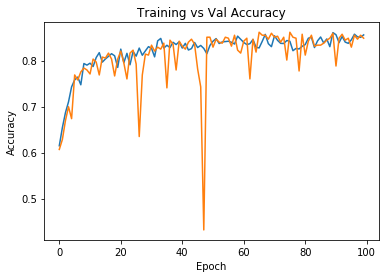

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
x = np.arange(len(acc))
plt.plot(x, acc)
plt.plot(x,val_acc)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Val Accuracy');

In [13]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [14]:
open("gender_model.tflite", "wb").write(tflite_model)

10120

In [21]:
ft_2 = np.mean([np.abs(i - 2) for i in [2.10, 2.08, 2.1]])
ft_5 = np.mean([np.abs(i - 5) for i in [4.94, 5.05, 5.04]])
ft_10 = np.mean([np.abs(i - 10) for i in [9.64, 9.88, 10.3]])
ft_15 = np.mean([np.abs(i - 15) for i in [14.49, 15.48, 15.52]])
print(ft_2, ft_5, ft_10, ft_15)

0.09333333333333342 0.04999999999999982 0.2599999999999998 0.5033333333333333


In [27]:
def mean_err(actual, guess_arr):
    mult = 100 / len(guess_arr)
    num = np.sum([(actual - i)/actual for i in guess_arr])
    return mult*num

data = [[2.10, 2.08, 2.1],
       [4.94, 5.05, 5.04],
       [9.64, 9.88, 10.3],
       [14.49, 15.48, 15.52]]

act = [2,5,10,15]

In [31]:
errs = [round(mean_err(x,y), 2) for x,y in zip(act, data)]
print(errs)

[-4.67, -0.2, 0.6, -1.09]
